In [1]:
from pydaqmx_helper.adc import ADC
from pydaqmx_helper.digital_io import Digital_IO
import time

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
adc = ADC()

In [4]:
adc.addChannels([1])
print(adc.getActiveChannels())

Activated Channel 1
[1]


In [6]:
dio = Digital_IO('0', 'output')

Created digital output port: Dev2/port0


In [23]:
def SetState(state, dio=dio):
    dio.write(state)


def Turn(enabled, N=1, prism=False, detector=False, direction="cw", doubleDetector=False, delay=0.1,\
         reverse=False, stationary=False):
    
    direction = direction.lower()
    voltages = []*N
    uncertainties = []*N
    itterations = []*N
    
    # Enable
    if not stationary:
        if enabled:
            currentState = 1
            SetState(currentState)
        else:
            currentState = 1
            SetState(0)
            return
    elif stationary:
        currentState = 0
        SetState(currentState)
        
    # Selecting Direction
    if (direction == "ccw"):
        currentState += 2
        SetState(currentState)
        
    elif (direction == "cw"):
        SetState(currentState)
    
    else:
        currentState = 0
        SetState(currentState)
        print("Motor Disabled, invalid input")
        return
    
    print("Starting Cycle...")
    # Do turn cycle
    # Delay 100 ms
    time.sleep(0.1)
    
    for i in range(N):
        print(f"Cycle {i}/{N}", end="\r")
              
        if detector:
            # Turn motor two
            currentState += 16
            SetState(currentState)
            currentState -= 16
            SetState(currentState)
            
            time.sleep(delay)
            
            if doubleDetector:
                currentState += 16
                SetState(currentState)
                currentState -= 16
                SetState(currentState)
                time.sleep(delay)
                
            if prism:
                # Turn motor one
                currentState += 8
                SetState(currentState)
                currentState -= 8
                SetState(currentState)
        
        if prism and not detector:
            # Turn motor one
            currentState += 8
            SetState(currentState)
            currentState -= 8
            SetState(currentState)

            time.sleep(delay)
        
        time.sleep(delay)
        
        itterations.append(i)
        V=adc.sampleVoltages(100, 10000)[1] # 100 samples at 10000 Hz
        voltages.append(np.mean(V))
        uncertainties.append(np.std(V))
        
        if stationary:
            time.sleep(1)
        
    
    print("Cycle Complete, disabling motors")
    currentState = 0
    SetState(currentState)
    
    if reverse:
        reverseItterations = itterations[::-1]
        return [reverseItterations, voltages, uncertainties]
    
    return [itterations, voltages, uncertainties]

In [59]:
Turn(False)

In [19]:
Turn(True, 10, prism=True, detector=False, direction="cw", doubleDetector=True);

Starting Cycle...
Cycle Complete, disabling motors


In [9]:
# Calibrate turns to degrees function
# From calibration, the system moves 45 degrees in 1000 turns for both the prism and the detector

def DegToTurns(deg):
    ratio = 45/1000 # degrees / turns
    return deg / ratio

def TurnsToDeg(turns):
    ratio = 45/1000 # degrees / turns
    return turns * ratio

In [10]:
DegToTurns(65)

1444.4444444444446

In [42]:
print(f"Red and Green Offset: {TurnsToDeg(670)}")
print(f"Blue Offset: {TurnsToDeg(970)}")

Red and Green Offset: 30.15
Blue Offset: 43.65


In [11]:
def WriteFile(fileName, data):
 
    data = np.transpose(data)
    
    with open(fileName, "w") as f:
        np.savetxt(fileName, data)

In [12]:
def LoadFile(path):
    data = np.array(np.loadtxt(path))
    return data

In [47]:
def PlotFile(path):
    data = LoadFile(path)
        
    plt.xlabel("N")
    plt.ylabel("Intensity")
    plt.grid()
    plt.plot(data[:,0], data[:,1])

# Data Acquisition

In [1]:
# Note that we assume detector needs to move twice as much as the prism
# This is a rough estimate, to account for errors we start with the laser at the left of the detector 
# and it moves to the right by the end of the cycle

# 0 deg is defined at perfect reflection, this is read at an angle of 130 deg
# Starting with the prism at 120

# Day 6, 15 nm - Note, 20 turn uncertainty on offset

In [93]:
Turn(True, 300, prism=True, detector=True, direction="cw", delay=0.04, doubleDetector=True)

Starting Cycle...
Cycle Complete, disabling motors


[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

## Red Offset 670 Turns

In [80]:
WriteFile("15nm/red/red01.txt", Turn(True, 600, prism=True, detector=True, direction="cw", doubleDetector=True))

Starting Cycle...
Cycle Complete, disabling motors


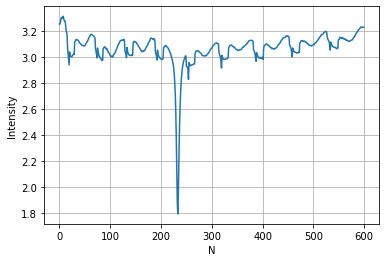

In [81]:
PlotFile("15nm/red/red01.txt")

In [83]:
WriteFile("15nm/red/red02.txt", Turn(True, 600, prism=True, detector=True, direction="ccw", doubleDetector=True, reverse=True))

Starting Cycle...
Cycle Complete, disabling motors


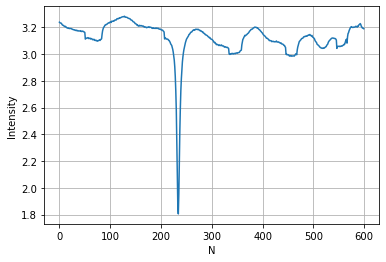

In [84]:
PlotFile("15nm/red/red02.txt")

In [85]:
WriteFile("15nm/red/red03.txt", Turn(True, 600, prism=True, detector=True, direction="cw", doubleDetector=True))

Starting Cycle...
Cycle Complete, disabling motors


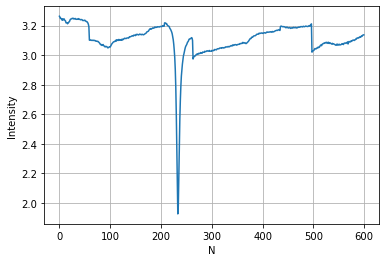

In [86]:
PlotFile("15nm/red/red03.txt")

In [87]:
WriteFile("15nm/red/red04.txt", Turn(True, 600, prism=True, detector=True, direction="ccw", doubleDetector=True, reverse=True))

Starting Cycle...
Cycle Complete, disabling motors


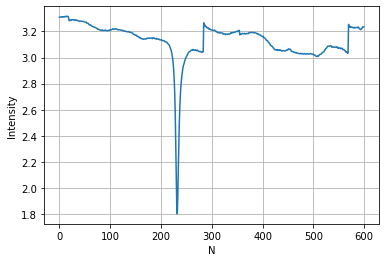

In [88]:
PlotFile("15nm/red/red04.txt")

## Green

In [89]:
WriteFile("15nm/green/green01.txt", Turn(True, 600, prism=True, detector=True, direction="cw", doubleDetector=True))

Starting Cycle...
Cycle Complete, disabling motors


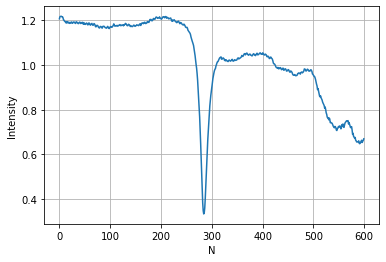

In [90]:
PlotFile("15nm/green/green01.txt")

In [91]:
WriteFile("15nm/green/green02.txt", Turn(True, 600, prism=True, detector=True, direction="ccw", doubleDetector=True, reverse=True))

Starting Cycle...
Cycle Complete, disabling motors


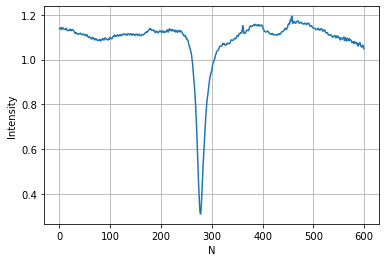

In [92]:
PlotFile("15nm/green/green02.txt")

## Blue Offset 970 turns

In [94]:
WriteFile("15nm/blue/blue01.txt", Turn(True, 600, prism=True, detector=True, direction="cw", doubleDetector=True))

Starting Cycle...
Cycle Complete, disabling motors


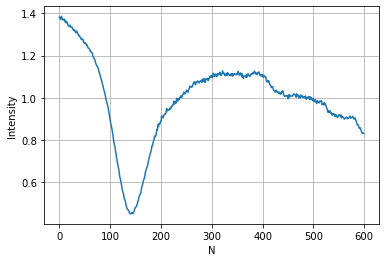

In [95]:
PlotFile("15nm/blue/blue01.txt")

In [96]:
WriteFile("15nm/blue/blue02.txt", Turn(True, 600, prism=True, detector=True, direction="ccw", doubleDetector=True, reverse=True))

Starting Cycle...
Cycle Complete, disabling motors


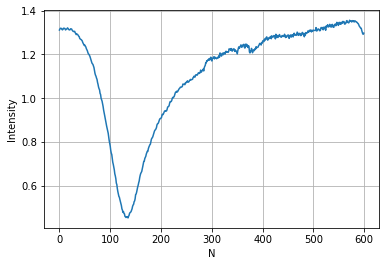

In [97]:
PlotFile("15nm/blue/blue02.txt")

In [98]:
WriteFile("15nm/blue/blue03.txt", Turn(True, 600, prism=True, detector=True, direction="cw", doubleDetector=True))

Starting Cycle...
Cycle Complete, disabling motors


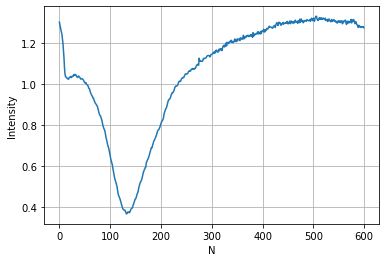

In [99]:
PlotFile("15nm/blue/blue03.txt")

## Day 6, Red laser without movement
Still shone through prism. Waiting for the 15nm silver

Laser on at 1414

In [25]:
# Started at 1423

WriteFile("13nm/still/still01.txt", Turn(True, 600, prism=False, detector=False, direction="cw", doubleDetector=False,\
                                         stationary=True))

Starting Cycle...
Cycle Complete, disabling motors


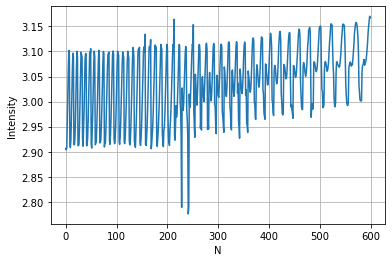

In [48]:
PlotFile("13nm/still/still01.txt")

In [54]:
# taken at 1500
WriteFile("13nm/still/still02.txt", Turn(True, 200, prism=False, detector=False, direction="cw", doubleDetector=False,\
                                         stationary=True))

Starting Cycle...
Cycle Complete, disabling motors


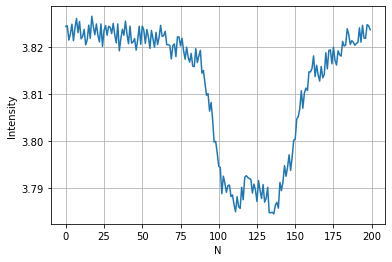

In [55]:
PlotFile("13nm/still/still02.txt")

In [43]:
# double checking offset using alternative method
# tracking back from start point
# turn of 300 from blue offset
# another turn of 300
# another turn of 130
# backwards turn of 60
# red offset of 670
Turn(True, 670, prism=True, direction="cw", delay=0.05)

Starting Cycle...
Cycle Complete, disabling motors


[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

## Day 4 10nm - Red, 30.5

In [34]:
WriteFile("day4_RED/day4Red1.txt", Turn(True, 600, prism=True, detector=True, direction="cw", doubleDetector=True))

Starting Cycle...
Cycle Complete, disabling motors


In [35]:
WriteFile("day4_RED/day4Red2.txt", Turn(True, 600, prism=True, detector=True, direction="ccw", doubleDetector=True, reverse=True))

Starting Cycle...
Cycle Complete, disabling motors


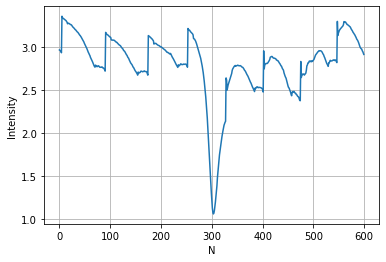

In [42]:
PlotFile("day4_RED/day4Red2.txt")

In [36]:
WriteFile("day4_RED/day4Red3.txt", Turn(True, 600, prism=True, detector=True, direction="cw", doubleDetector=True, reverse=False))

Starting Cycle...
Cycle Complete, disabling motors


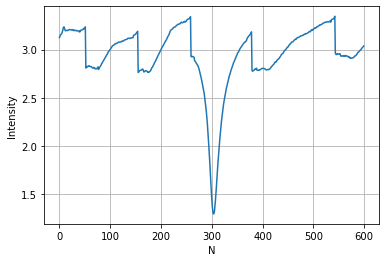

In [41]:
PlotFile("day4_RED/day4Red3.txt")

In [43]:
WriteFile("day4_RED/day4Red4.txt", Turn(True, 600, prism=True, detector=True, direction="ccw", doubleDetector=True, reverse=True))

Starting Cycle...
Cycle Complete, disabling motors


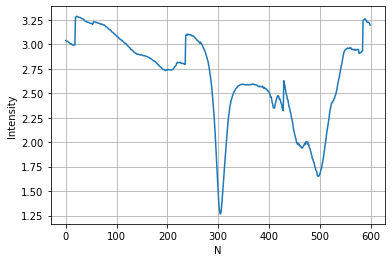

In [44]:
PlotFile("day4_RED/day4Red4.txt")

In [45]:
WriteFile("day4_RED/day4Red5.txt", Turn(True, 600, prism=True, detector=True, direction="cw", doubleDetector=True, reverse=False))

Starting Cycle...
Cycle Complete, disabling motors


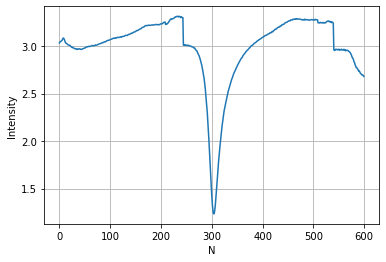

In [46]:
PlotFile("day4_RED/day4Red5.txt")

In [47]:
WriteFile("day4_RED/day4Red6.txt", Turn(True, 600, prism=True, detector=True, direction="ccw", doubleDetector=True, reverse=True))

Starting Cycle...
Cycle Complete, disabling motors


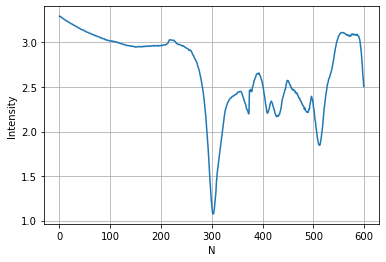

In [48]:
PlotFile("day4_RED/day4Red6.txt")

In [49]:
WriteFile("day4_RED/day4Red7.txt", Turn(True, 600, prism=True, detector=True, direction="cw", doubleDetector=True, reverse=False))

Starting Cycle...
Cycle Complete, disabling motors


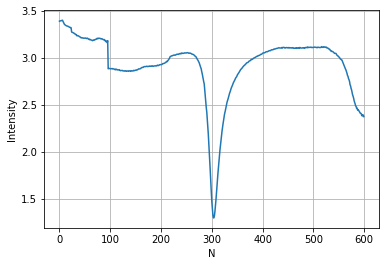

In [50]:
PlotFile("day4_RED/day4Red7.txt")

In [53]:
# Laptop lid closed moniter off
WriteFile("day4_RED/day4Red8.txt", Turn(True, 600, prism=True, detector=True, direction="cw", doubleDetector=True, reverse=False))

Starting Cycle...
Cycle Complete, disabling motors


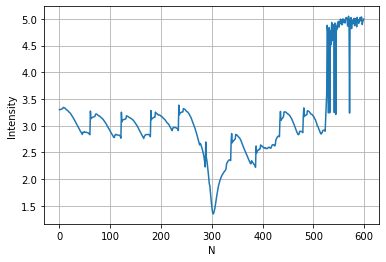

In [57]:
PlotFile("day4_RED/day4Red8.txt")

In [55]:
WriteFile("day4_RED/day4Red9.txt", Turn(True, 600, prism=True, detector=True, direction="ccw", doubleDetector=True, reverse=True))

Starting Cycle...
Cycle Complete, disabling motors


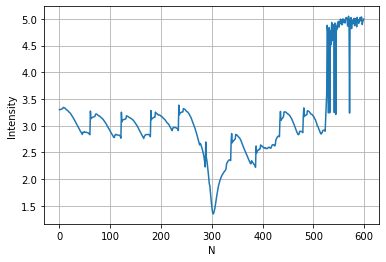

In [58]:
PlotFile("day4_RED/day4Red9.txt")

In [59]:
WriteFile("day4_RED/day4Red10.txt", Turn(True, 600, prism=True, detector=True, direction="cw", doubleDetector=True, reverse=False))

Starting Cycle...
Cycle Complete, disabling motors


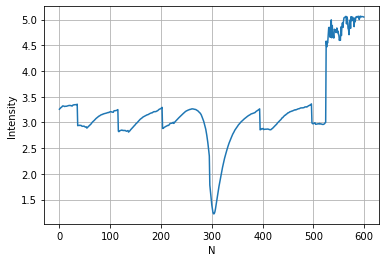

In [60]:
PlotFile("day4_RED/day4Red10.txt")

# Green 30.5

In [66]:
WriteFile("day4_GREEN/day4Green1.txt", Turn(True, 600, prism=True, detector=True, direction="ccw", doubleDetector=True, reverse=True))

Starting Cycle...
Cycle Complete, disabling motors


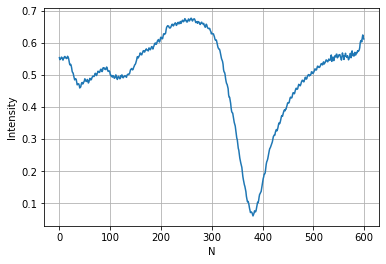

In [67]:
PlotFile("day4_GREEN/day4Green1.txt")

In [68]:
WriteFile("day4_GREEN/day4Green2.txt", Turn(True, 600, prism=True, detector=True, direction="cw", doubleDetector=True, reverse=False))

Starting Cycle...
Cycle Complete, disabling motors


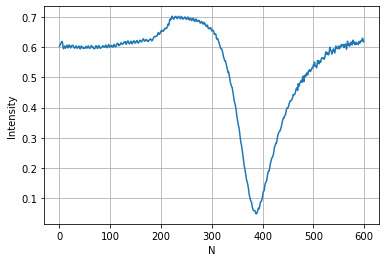

In [69]:
PlotFile("day4_GREEN/day4Green2.txt")

In [70]:
WriteFile("day4_GREEN/day4Green3.txt", Turn(True, 600, prism=True, detector=True, direction="ccw", doubleDetector=True, reverse=True))

Starting Cycle...
Cycle Complete, disabling motors


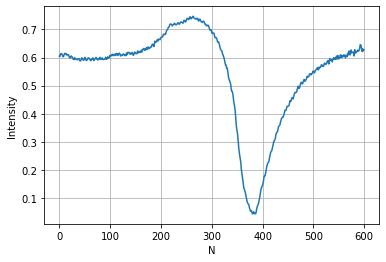

In [71]:
PlotFile("day4_GREEN/day4Green3.txt")

In [72]:
WriteFile("day4_GREEN/day4Green4.txt", Turn(True, 600, prism=True, detector=True, direction="cw", doubleDetector=True, reverse=False))

Starting Cycle...
Cycle Complete, disabling motors


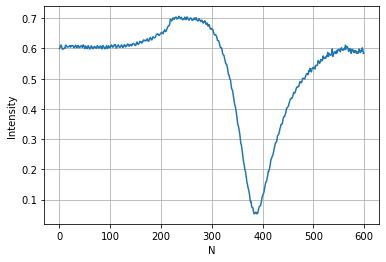

In [73]:
PlotFile("day4_GREEN/day4Green4.txt")

In [74]:
WriteFile("day4_GREEN/day4Green5.txt", Turn(True, 600, prism=True, detector=True, direction="ccw", doubleDetector=True, reverse=True))

Starting Cycle...
Cycle Complete, disabling motors


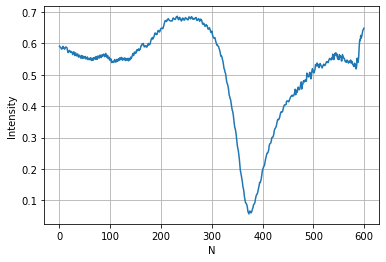

In [75]:
PlotFile("day4_GREEN/day4Green5.txt")

# Blue 43.5

In [87]:
WriteFile("day4_BLUE/day4Blue1.txt", Turn(True, 600, prism=True, detector=True, direction="ccw", doubleDetector=True, reverse=True))

Starting Cycle...
Cycle Complete, disabling motors


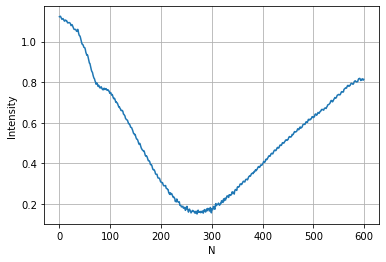

In [88]:
PlotFile("day4_BLUE/day4Blue1.txt")

In [89]:
WriteFile("day4_BLUE/day4Blue2.txt", Turn(True, 600, prism=True, detector=True, direction="cw", doubleDetector=True, reverse=False))

Starting Cycle...
Cycle Complete, disabling motors


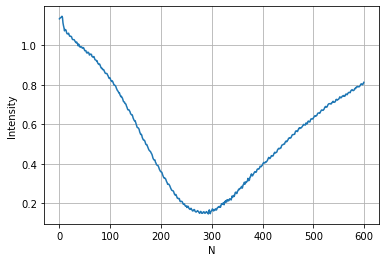

In [91]:
PlotFile("day4_BLUE/day4Blue2.txt")

In [92]:
WriteFile("day4_BLUE/day4Blue3.txt", Turn(True, 600, prism=True, detector=True, direction="ccw", doubleDetector=True, reverse=True))

Starting Cycle...
Cycle Complete, disabling motors


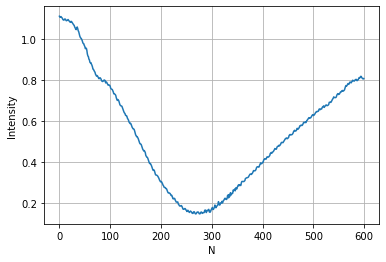

In [93]:
PlotFile("day4_BLUE/day4Blue3.txt")

# 13 nm

## Red - Time or Laser Temperature or number of runs dependence of oscillations
Laser turned on at 1525

Run 1, at 1526. 300 cycles in the clockwise direction

In [20]:
WriteFile("dep1526.txt", Turn(True, 300, prism=True, detector=True, direction="cw", doubleDetector=True, reverse=False))

Starting Cycle...
Cycle Complete, disabling motors


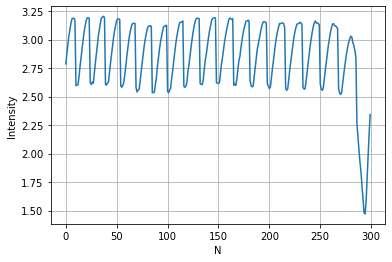

In [21]:
PlotFile("dep1526.txt")

Run 2, at 1530. 300 cycles in the anticlockwise direction

In [22]:
WriteFile("dep1530.txt", Turn(True, 300, prism=True, detector=True, direction="ccw", doubleDetector=True, reverse=True))

Starting Cycle...
Cycle Complete, disabling motors


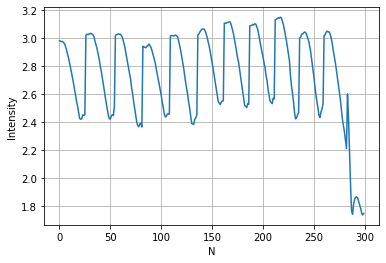

In [23]:
PlotFile("dep1530.txt")

Run 3, at 1534. 300 cycles in the clockwise direction

In [24]:
WriteFile("dep1534.txt", Turn(True, 300, prism=True, detector=True, direction="cw", doubleDetector=True, reverse=False))

Starting Cycle...
Cycle Complete, disabling motors


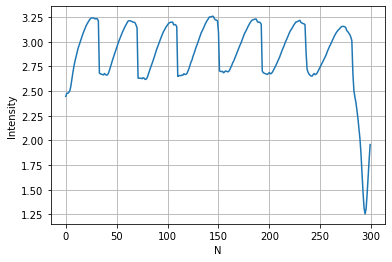

In [25]:
PlotFile("dep1534.txt")

Run 4, at 1538. 300 cycles in the anticlockwise direction

In [26]:
WriteFile("dep1538.txt", Turn(True, 300, prism=True, detector=True, direction="ccw", doubleDetector=True, reverse=True))

Starting Cycle...
Cycle Complete, disabling motors


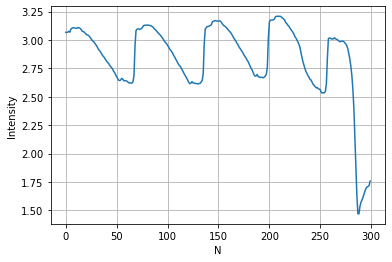

In [27]:
PlotFile("dep1538.txt")

Run 5, at 1542. 300 cycles in the clockwise direction

In [28]:
WriteFile("dep1542.txt", Turn(True, 300, prism=True, detector=True, direction="cw", doubleDetector=True, reverse=False))

Starting Cycle...
Cycle Complete, disabling motors


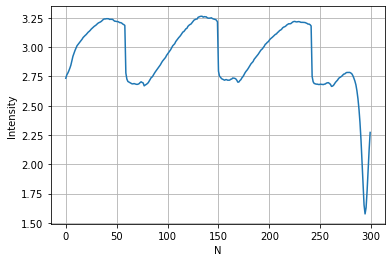

In [29]:
PlotFile("dep1542.txt")

Run 6, at 1546. 300 cycles in the anticlockwise direction

In [30]:
WriteFile("dep1546.txt", Turn(True, 300, prism=True, detector=True, direction="ccw", doubleDetector=True, reverse=True))

Starting Cycle...
Cycle Complete, disabling motors


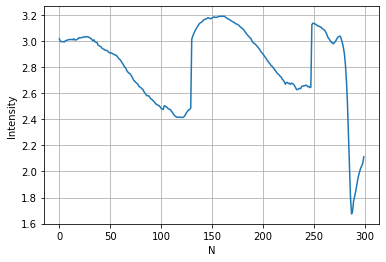

In [31]:
PlotFile("dep1546.txt")

Run 7, at 1550. 300 cycles in the clockwise direction

In [35]:
WriteFile("dep1550.txt", Turn(True, 300, prism=True, detector=True, direction="cw", doubleDetector=True, reverse=False))

Starting Cycle...
Cycle Complete, disabling motors


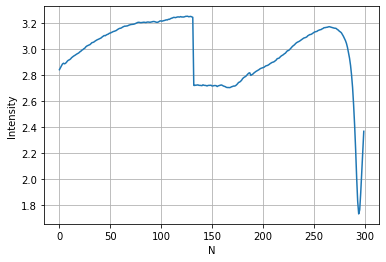

In [36]:
PlotFile("dep1550.txt")

Run 8, at 1554. 300 cycles in the anticlockwise direction

In [37]:
WriteFile("dep1554.txt", Turn(True, 300, prism=True, detector=True, direction="ccw", doubleDetector=True, reverse=True))

Starting Cycle...
Cycle Complete, disabling motors


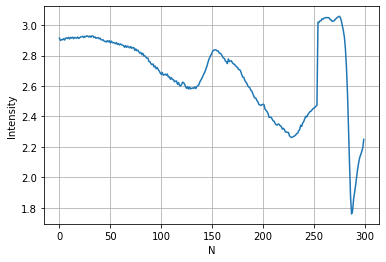

In [38]:
PlotFile("dep1554.txt")

Run 9, at 1558. 300 cycles in the clockwise direction

In [39]:
WriteFile("dep1558.txt", Turn(True, 300, prism=True, detector=True, direction="cw", doubleDetector=True, reverse=False))

Starting Cycle...
Cycle Complete, disabling motors


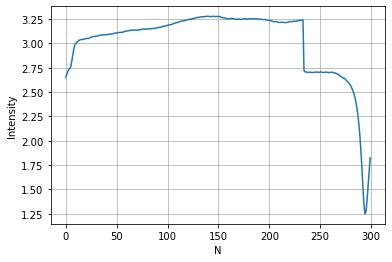

In [40]:
PlotFile("dep1558.txt")

Run 10, at 1602. 300 cycles in the anticlockwise direction

In [41]:
WriteFile("dep1602.txt", Turn(True, 300, prism=True, detector=True, direction="ccw", doubleDetector=True, reverse=True))

Starting Cycle...
Cycle Complete, disabling motors


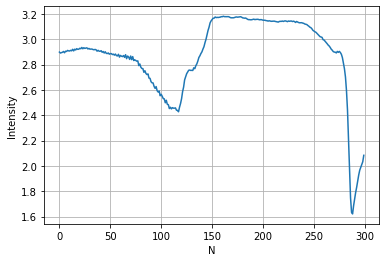

In [42]:
PlotFile("dep1602.txt")

## Data Collection - Red - 13nm , offset 29.5

In [43]:
# Starting at 1604

In [44]:
WriteFile("13nm/red/red01.txt", Turn(True, 600, prism=True, detector=True, direction="cw", doubleDetector=True, reverse=False))

Starting Cycle...
Cycle Complete, disabling motors


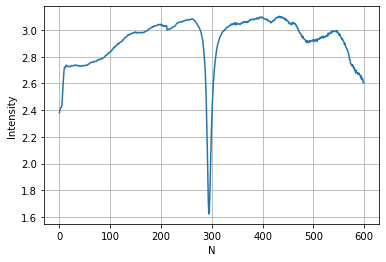

In [45]:
PlotFile("13nm/red/red01.txt")

In [48]:
WriteFile("13nm/red/red02.txt", Turn(True, 600, prism=True, detector=True, direction="cw", doubleDetector=True, reverse=False))

Starting Cycle...
Cycle Complete, disabling motors


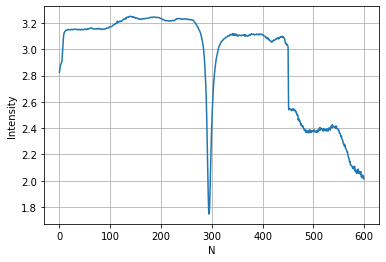

In [49]:
PlotFile("13nm/red/red02.txt") # taken at 1616

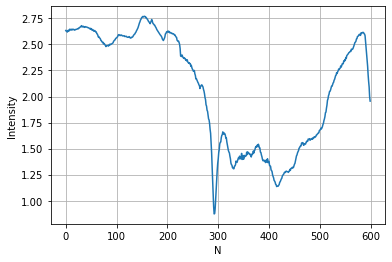

In [50]:
PlotFile("13nm/red/red03.txt")

## Green - 13nm , offset 29.5

In [52]:
WriteFile("13nm/green/green01.txt", Turn(True, 600, prism=True, detector=True, direction="cw", doubleDetector=True, reverse=False))

Starting Cycle...
Cycle Complete, disabling motors


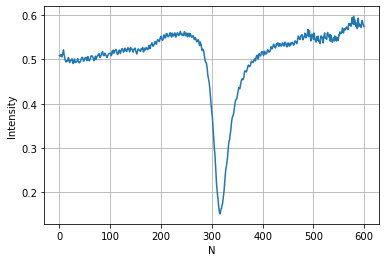

In [53]:
PlotFile("13nm/green/green01.txt")

In [54]:
WriteFile("13nm/green/green02.txt", Turn(True, 600, prism=True, detector=True, direction="ccw", doubleDetector=True, reverse=True))

Starting Cycle...
Cycle Complete, disabling motors


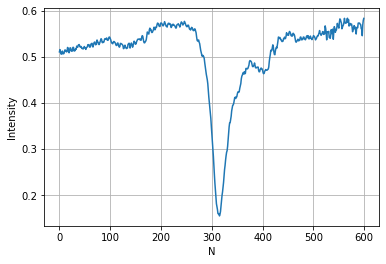

In [55]:
PlotFile("13nm/green/green02.txt")

In [56]:
WriteFile("13nm/green/green03.txt", Turn(True, 600, prism=True, detector=True, direction="cw", doubleDetector=True, reverse=False))

Starting Cycle...
Cycle Complete, disabling motors


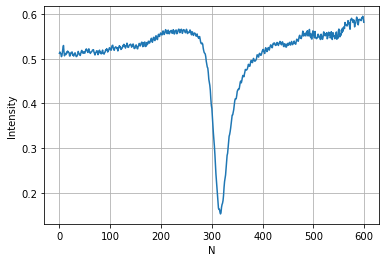

In [57]:
PlotFile("13nm/green/green03.txt")

## Blue - 13nm Offset 43

In [61]:
WriteFile("13nm/blue/blue01.txt", Turn(True, 600, prism=True, detector=True, direction="cw", doubleDetector=True, reverse=False))

Starting Cycle...
Cycle Complete, disabling motors


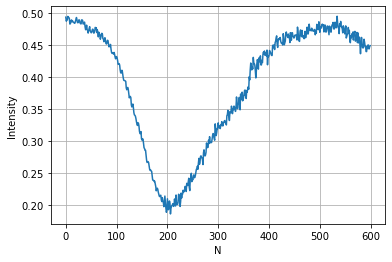

In [62]:
PlotFile("13nm/blue/blue01.txt")

In [66]:
WriteFile("13nm/blue/blue02.txt", Turn(True, 600, prism=True, detector=True, direction="cw", doubleDetector=True, reverse=False))

Starting Cycle...
Cycle Complete, disabling motors


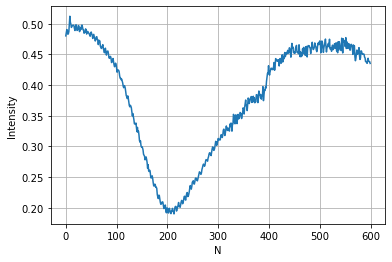

In [67]:
PlotFile("13nm/blue/blue02.txt")

In [68]:
WriteFile("13nm/blue/blue03.txt", Turn(True, 600, prism=True, detector=True, direction="ccw", doubleDetector=True, reverse=True))

Starting Cycle...
Cycle Complete, disabling motors


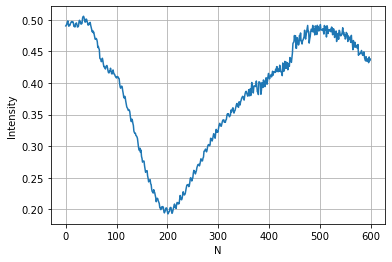

In [69]:
PlotFile("13nm/blue/blue03.txt")

In [59]:
Turn(False)

In [70]:
Turn(True, 300, prism=True, detector=True, direction="ccw", doubleDetector=True);

Starting Cycle...
Cycle Complete, disabling motors
